In [1]:
import pandas as pd

file = pd.read_csv(r"C:\Users\belve\Downloads\Credit_card_dataset.csv")
file_copy = file.copy()
file.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [2]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [3]:
file.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [4]:
file.dropna(subset = ['CREDIT_LIMIT'], inplace=True)

In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8949 non-null   object 
 1   BALANCE_FREQUENCY  8949 non-null   float64
 2   PURCHASES          8949 non-null   float64
 3   PAYMENTS           8949 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8949 non-null   float64
dtypes: float64(5), object(1)
memory usage: 489.4+ KB


<Axes: >

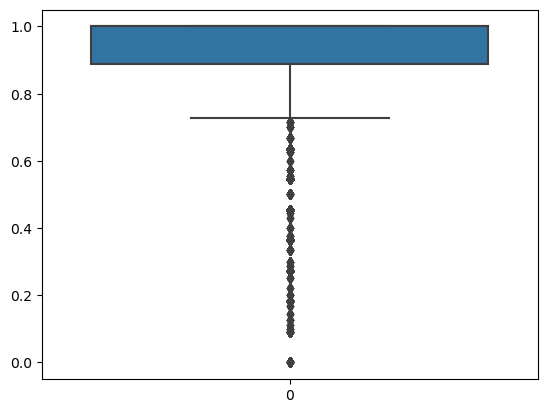

In [6]:
import seaborn as sns
sns.boxplot(file['BALANCE_FREQUENCY'])

<Axes: >

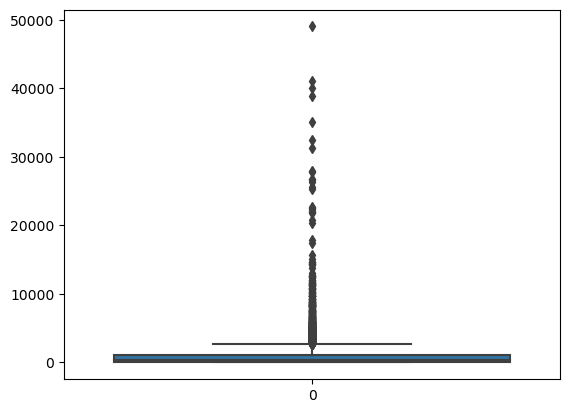

In [8]:
sns.boxplot(file['PURCHASES'])

<Axes: >

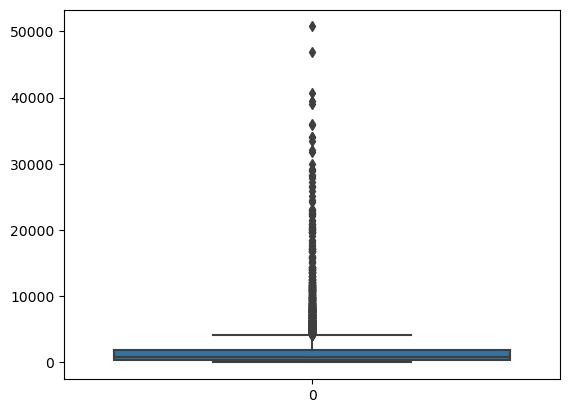

In [9]:
sns.boxplot(file['PAYMENTS'])

<Axes: >

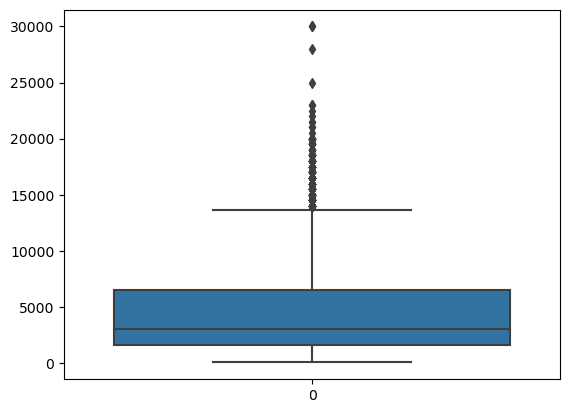

In [10]:
sns.boxplot(file['CREDIT_LIMIT'])

<Axes: >

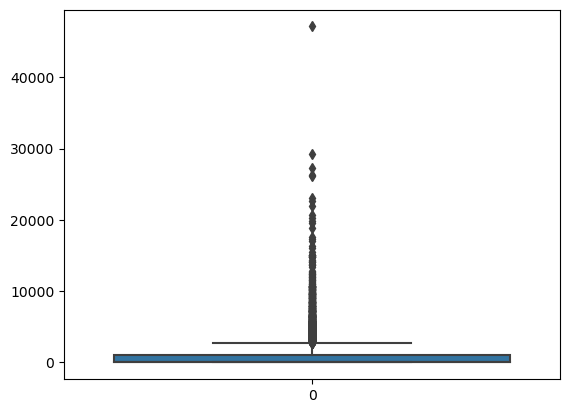

In [11]:
sns.boxplot(file['CASH_ADVANCE'])

from ydata_profiling import ProfileReport
report = ProfileReport(file, title='redit_card_dataset Report')
report.to_file('redit_card_dataset Report.html')

In [7]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)
    outliers_index = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return outliers_index

In [9]:
outliers_index_list = []
for feature in ['BALANCE_FREQUENCY','PURCHASES','PAYMENTS','CREDIT_LIMIT','CASH_ADVANCE']:
    outliers_index_list.extend(outliers(file, feature))

In [10]:
outliers_index_list

[3,
 9,
 17,
 22,
 39,
 46,
 54,
 63,
 81,
 82,
 83,
 98,
 99,
 100,
 101,
 103,
 116,
 118,
 129,
 130,
 132,
 154,
 155,
 166,
 170,
 172,
 179,
 181,
 183,
 192,
 200,
 205,
 209,
 215,
 217,
 228,
 238,
 241,
 245,
 255,
 275,
 277,
 288,
 319,
 336,
 338,
 341,
 343,
 345,
 353,
 354,
 358,
 372,
 375,
 377,
 383,
 385,
 406,
 409,
 412,
 418,
 432,
 440,
 447,
 449,
 469,
 480,
 482,
 498,
 517,
 522,
 535,
 538,
 541,
 573,
 586,
 588,
 595,
 596,
 605,
 607,
 618,
 621,
 632,
 635,
 637,
 653,
 654,
 657,
 659,
 667,
 680,
 724,
 736,
 737,
 761,
 764,
 781,
 784,
 794,
 796,
 799,
 802,
 814,
 820,
 860,
 877,
 897,
 912,
 914,
 918,
 920,
 940,
 946,
 947,
 955,
 956,
 978,
 1008,
 1009,
 1017,
 1021,
 1028,
 1034,
 1040,
 1041,
 1046,
 1052,
 1066,
 1074,
 1075,
 1077,
 1080,
 1083,
 1085,
 1092,
 1097,
 1116,
 1123,
 1127,
 1131,
 1133,
 1144,
 1155,
 1157,
 1164,
 1165,
 1166,
 1174,
 1182,
 1188,
 1189,
 1191,
 1203,
 1204,
 1209,
 1210,
 1215,
 1219,
 1222,
 1223,
 1228,

In [11]:
len(outliers_index_list)

4386

In [12]:
ordered_with_no_duplicate = set(outliers_index_list)
len(ordered_with_no_duplicate)

3329

In [13]:
def remove_rows_with_outliers(df, list):
    df = df.drop(list)
    return df

In [14]:
cleaned_file = remove_rows_with_outliers(file, ordered_with_no_duplicate)

In [15]:
cleaned_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5620 entries, 0 to 8948
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            5620 non-null   object 
 1   BALANCE_FREQUENCY  5620 non-null   float64
 2   PURCHASES          5620 non-null   float64
 3   PAYMENTS           5620 non-null   float64
 4   CREDIT_LIMIT       5620 non-null   float64
 5   CASH_ADVANCE       5620 non-null   float64
dtypes: float64(5), object(1)
memory usage: 307.3+ KB


In [16]:
cleaned_file = cleaned_file.drop('CUST_ID', axis=1)

In [17]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
clust_labels = model.fit_predict(cleaned_file)
agglomerative = pd.DataFrame(clust_labels)
agglomerative

C:\Users\belve\miniconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,0
0,1
1,0
2,1
3,1
4,1
...,...
5615,0
5616,1
5617,1
5618,1


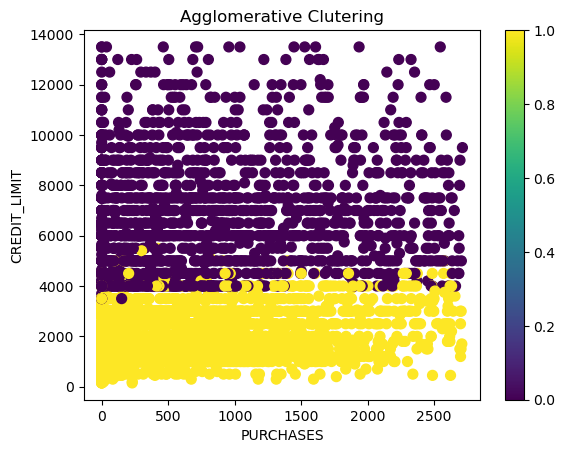

In [18]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (cleaned_file ['PURCHASES'] , cleaned_file ["CREDIT_LIMIT"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("PURCHASES")
ax.set_ylabel("CREDIT_LIMIT")
plt.colorbar(scatter)

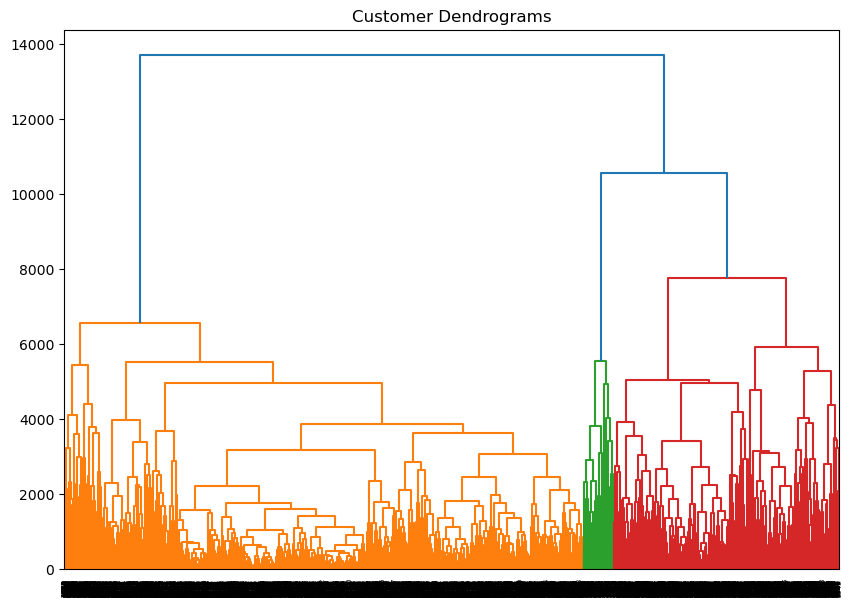

In [31]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(cleaned_file, method="complete"))

In [19]:
from sklearn.cluster import KMeans

x = cleaned_file.iloc[:,:].values
model = KMeans(n_clusters=2)
predicted = model.fit_predict(x)

C:\Users\belve\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
predicted

array([1, 0, 1, ..., 1, 1, 1])

In [24]:
cleaned_file['predicted'] = predicted
cleaned_file.head()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE,predicted
0,0.818182,95.40,201.802084,1000.0,0.0,1
2,1.000000,773.17,622.066742,7500.0,0.0,0
4,1.000000,16.00,678.334763,1200.0,0.0,1
5,1.000000,1333.28,1400.057770,1800.0,0.0,1
7,1.000000,436.20,679.065082,2300.0,0.0,1


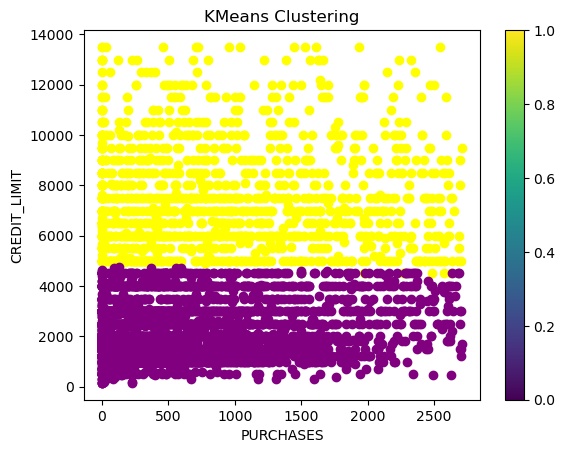

In [25]:
df1 = cleaned_file[cleaned_file.predicted == 0]
df2 = cleaned_file[cleaned_file.predicted == 1]

plt.scatter(df1['PURCHASES'], df1['CREDIT_LIMIT'], color='yellow')
plt.scatter(df2['PURCHASES'], df2['CREDIT_LIMIT'], color='purple')

plt.title('KMeans Clustering')
plt.xlabel("PURCHASES")
plt.ylabel("CREDIT_LIMIT")
plt.colorbar()

In [88]:
from sklearn.cluster import KMeans
sum_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters= k)
    km.fit_predict(cleaned_file)
    sum_squared_distances.append(km.inertia_)

C:\Users\belve\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\belve\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\belve\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\belve\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

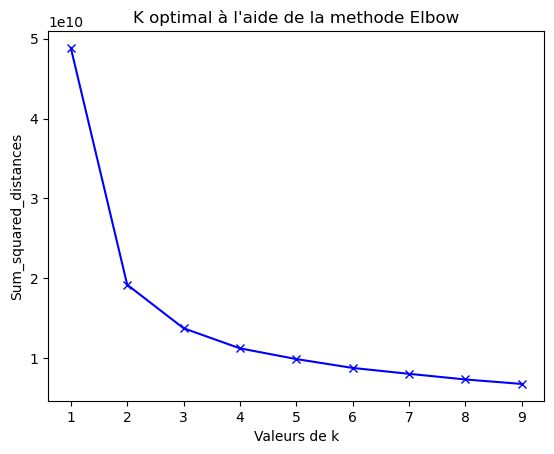

In [89]:
plt.plot(K, sum_squared_distances, 'bx-')
plt.xlabel('Valeurs de k')
plt.ylabel('Sum_squared_distances')
plt.title('K optimal à l\'aide de la methode Elbow')
plt.show()

In [125]:
x = cleaned_file.iloc[:,:].values
model = KMeans(n_clusters=2)
predicted = model.fit_predict(x)

C:\Users\belve\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [126]:
predicted

array([0, 1, 0, ..., 0, 0, 0])

In [127]:
cleaned_file['predicted'] = predicted
cleaned_file.head()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE,predicted
0,0.818182,95.40,201.802084,1000.0,0.0,0
2,1.000000,773.17,622.066742,7500.0,0.0,1
4,1.000000,16.00,678.334763,1200.0,0.0,0
5,1.000000,1333.28,1400.057770,1800.0,0.0,0
7,1.000000,436.20,679.065082,2300.0,0.0,0


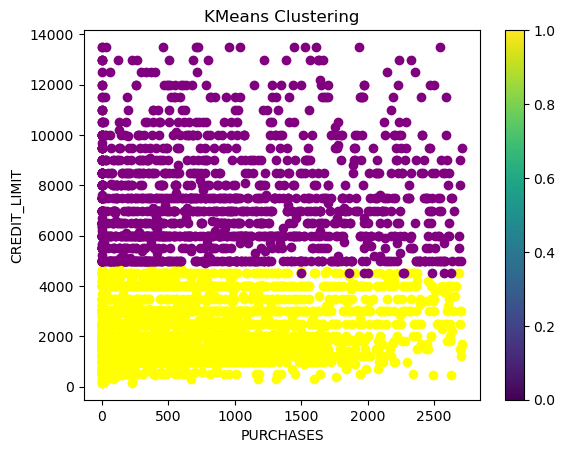

In [129]:
df1 = cleaned_file[cleaned_file.predicted == 0]
df2 = cleaned_file[cleaned_file.predicted == 1]

plt.scatter(df1['PURCHASES'], df1['CREDIT_LIMIT'], color='yellow')
plt.scatter(df2['PURCHASES'], df2['CREDIT_LIMIT'], color='purple')

plt.title('KMeans Clustering')
plt.xlabel("PURCHASES")
plt.ylabel("CREDIT_LIMIT")
plt.colorbar()